# Machine Learning - Assignment 1

## Naive Bayes Learning algorithm, Cross-validation, and ROC-Curves

The aim of the assignment is to implement:

* Naive Bayes learning algorithm for binary classification tasks
* Visualization to plot a ROC-curve
* A cross-validation test
* Visualization of the average ROC-curve of a cross-validation test

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the inputs or outputs of the function.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, but how you return values from the different functions might vary, and you might find yourself going back and change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries and reading the data.

Look at the output to get an idea of how the data is structured.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import e, pi, sqrt

data = pd.read_csv("iris.csv").to_numpy()

mapped, index, unique_arr = np.unique(data[:, -1], return_index=True, return_inverse=True)
data[:, -1] = unique_arr
iris_setosa, iris_versicolor, iris_virginica = np.split(data, index[1:])

print(f"Full data array (features and labels):\n{iris_setosa[:3]}\n")
print("###############\n")
print(f"Train features (first 4 columns):\n{iris_setosa[:3, :-1]}\n")
print(f"Labels (last column):\n{iris_setosa[:3, -1:]}\n")
print(f"Names of labels:\n{[[numb, name] for numb, name in enumerate(mapped)]}")

Full data array (features and labels):
[[5.1 3.5 1.4 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [4.7 3.2 1.3 0.2 0]]

###############

Train features (first 4 columns):
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Labels (last column):
[[0]
 [0]
 [0]]

Names of labels:
[[0, 'Iris-setosa'], [1, 'Iris-versicolor'], [2, 'Iris-virginica']]


In [2]:
# Example print of the 3 first datapoints (similar as above):
iris_setosa[:3]

array([[5.1, 3.5, 1.4, 0.2, 0],
       [4.9, 3.0, 1.4, 0.2, 0],
       [4.7, 3.2, 1.3, 0.2, 0]], dtype=object)

## Data handling functions

As a start, we are going to implement some basic data handling functions to use in the future.

### 1) Split class into a train and test set

First, we need to be able to split the class into a train and test set.

In [10]:
import numpy as np

def train_test_split(class_data, test_size=0.2):
    # Shuffle the data
    np.random.shuffle(class_data)
    
    # Calculate the number of test samples
    test_size = int(len(class_data) * test_size)
    
    # Split the data into train and test sets
    train = class_data[:-test_size]
    test = class_data[-test_size:]
    
    return train, test

# Example usage with the iris_setosa class
iris_setosa = np.array([
    [5.1, 3.5, 1.4, 0.2, 0],
    [4.9, 3.0, 1.4, 0.2, 0],
    [4.7, 3.2, 1.3, 0.2, 0],
    [4.6, 3.1, 1.5, 0.2, 0],
    [5.0, 3.6, 1.4, 0.2, 0],
    # Add more data points as needed
])

In [11]:
# Split the iris_setosa data into train and test sets
train_set, test_set = train_test_split(iris_setosa)

# Print the output
print("Train Set:")
print(train_set)
print("\nTest Set:")
print(test_set)

Train Set:
[[4.6 3.1 1.5 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [5.1 3.5 1.4 0.2 0. ]]

Test Set:
[[5.  3.6 1.4 0.2 0. ]]


### 2) Split data into features and labels

The data as shown above is not always the optimal shape. To help us keep track of things, we can split the data into its features and labels seperately.

Each class is 4 features and 1 label in the same array: 

* **[feature 1, feature 2, feature 3, feature 4, label]**

It would help us later to have the features and labels in seperate arrays in the form: 

* **[feature 1, feature 2, feature 3, feature 4]** and **[label]**

Here you are going to implement this functionallity.

In [8]:
import numpy as np

# Define the train_test_split function
def train_test_split(class_data, test_size=0.2):
    # Shuffle the data
    np.random.shuffle(class_data)
    
    # Calculate the number of test samples
    test_size = int(len(class_data) * test_size)
    
    # Split the data into train and test sets
    train = class_data[:-test_size]
    test = class_data[-test_size:]
    
    return train, test# Define the class_split function
def class_split(data):
    # Split one class into its features and labels
    features = data[:, :-1]  # All columns except the last one
    labels = data[:, -1]      # Last column
    return features, labels


We should first test the "**class_split**" function on one of the classes above (iris_setosa, etc...) to make sure it works properly.

In [9]:
# Assuming iris_setosa is already defined as a numpy array
iris_setosa = np.array([
    [5.1, 3.5, 1.4, 0.2, 0],
    [4.9, 3.0, 1.4, 0.2, 0],
    [4.7, 3.2, 1.3, 0.2, 0],
    [4.6, 3.1, 1.5, 0.2, 0],
    [5.0, 3.6, 1.4, 0.2, 0],
    # Add more data points as needed
])

# Test the class splitting function
features, labels = class_split(iris_setosa)

# Print the output
print("Features:\n", features)
print("Labels:\n", labels)

Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels:
 [0. 0. 0. 0. 0.]


We should also try to **1)** first split a class into a train and test set, **2)** split each of these two into features and abels. In total there should be 4 arrays (2 feature and 2 label arrays).

In [11]:
# Split the iris_setosa data into train and test sets
train_set, test_set = train_test_split(iris_setosa)

# Split each of these into features and labels
train_features, train_labels = class_split(train_set)
test_features, test_labels = class_split(test_set)

# Print the output
print("Train Features:\n", train_features)
print("Train Labels:\n", train_labels)
print("Test Features:\n", test_features)
print("Test Labels:\n", test_labels)

Train Features:
 [[5.  3.6 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Train Labels:
 [0. 0. 0. 0.]
Test Features:
 [[4.9 3.  1.4 0.2]]
Test Labels:
 [0.]


We should also try to **1)** first split a class into a train and test set, **2)** split each of these two into features and abels. In total there should be 4 arrays (2 feature and 2 label arrays).

Think a bit before going to the next task, what can easily go wrong in the above code?

## Naive Bayes learning algorithm

When implementing the Navie Bayes learning algorithm, we can break it down into a few components.

We will implement these components one at a time.

### 3) Calculate feature statistics

First, we need to implement a function that returns feature statistics (means, standard deviation, priors) for a given set of feature data for a single class. This is the equivalent of "training" the naive bayes model.

**Note 1:** Each feature gets its own mean and standard deviation!

**Note 2:** The way you structure the functions (what is returned) shapes the remainder of the assignment.

In [16]:
import numpy as np

def class_split(data):
    """
    Split the dataset into features and labels.

    Args:
        data (numpy array): Dataset where the last column represents labels.

    Returns:
        tuple: (features, labels)
    """
    features = data[:, :-1]  # All columns except the last
    labels = data[:, -1]     # The last column
    return features, labels

def calculate_feature_statistics(features, total_samples):
    """
    Calculate mean, standard deviation, and prior probability for a given class.

    Args:
        features (numpy array): Feature data for the class.
        total_samples (int): Total number of samples in the dataset.

    Returns:
        tuple: (means, standard deviations, prior_probability)
    """
    means = np.mean(features, axis=0)
    stdevs = np.std(features, axis=0)
    prior = features.shape[0] / total_samples
    return means, stdevs, prior

To make sure the function works, we should test it before proceding.

In [17]:
# Define the Iris dataset (example values; replace with actual dataset if needed)
iris_setosa = np.array([[5.1, 3.5, 1.4, 0.2, 0],
                        [4.9, 3.0, 1.4, 0.2, 0],
                        [4.7, 3.2, 1.3, 0.2, 0]])

iris_versicolor = np.array([[7.0, 3.2, 4.7, 1.4, 1],
                            [6.4, 3.2, 4.5, 1.5, 1],
                            [6.9, 3.1, 4.9, 1.5, 1]])

iris_virginica = np.array([[6.3, 3.3, 6.0, 2.5, 2],
                           [5.8, 2.7, 5.1, 1.9, 2],
                           [7.1, 3.0, 5.9, 2.1, 2]])

# Concatenate all classes into one dataset
data = np.vstack((iris_setosa, iris_versicolor, iris_virginica))

# Split data into features and labels for each class
features_setosa, labels_setosa = class_split(iris_setosa)
features_versicolor, labels_versicolor = class_split(iris_versicolor)
features_virginica, labels_virginica = class_split(iris_virginica)

# Calculate the total number of samples from all classes
total_samples = len(iris_setosa) + len(iris_versicolor) + len(iris_virginica)

# Calculate feature statistics for each class
means_setosa, stdevs_setosa, prior_setosa = calculate_feature_statistics(features_setosa, total_samples)
means_versicolor, stdevs_versicolor, prior_versicolor = calculate_feature_statistics(features_versicolor, total_samples)
means_virginica, stdevs_virginica, prior_virginica = calculate_feature_statistics(features_virginica, total_samples)

# Print the output for each class
print("Setosa:")
print("  Means:", means_setosa)
print("  Standard Deviations:", stdevs_setosa)
print("  Prior Probability:", prior_setosa)

print("Versicolor:")
print("  Means:", means_versicolor)
print("  Standard Deviations:", stdevs_versicolor)
print("  Prior Probability:", prior_versicolor)

print("Virginica:")
print("  Means:", means_virginica)
print("  Standard Deviations:", stdevs_virginica)
print("  Prior Probability:", prior_virginica)


Setosa:
  Means: [4.9        3.23333333 1.36666667 0.2       ]
  Standard Deviations: [1.63299316e-01 2.05480467e-01 4.71404521e-02 2.77555756e-17]
  Prior Probability: 0.3333333333333333
Versicolor:
  Means: [6.76666667 3.16666667 4.7        1.46666667]
  Standard Deviations: [0.26246693 0.04714045 0.16329932 0.04714045]
  Prior Probability: 0.3333333333333333
Virginica:
  Means: [6.4        3.         5.66666667 2.16666667]
  Standard Deviations: [0.53541261 0.24494897 0.4027682  0.24944383]
  Prior Probability: 0.3333333333333333


### 4) Gaussian probability density function (Gaussian PDF)

Now we need to implement the gaussian probability density function to use for a single datapoint.

**Note:** Look at the imports in the first cell at the top, it has some math numbers for easy use here. 

In [18]:
import pandas as pd
import math

# Load the Iris dataset
iris_file_path = 'iris.csv'  # Replace with the correct path to your file
iris_data = pd.read_csv(iris_file_path)

def gaussian_probability_density_function(x, mean, stdev):
    """
    Computes the Gaussian probability density function for a single data point.
    
    Args:
    x (float): The data point.
    mean (float): The mean of the feature.
    stdev (float): The standard deviation of the feature.
    
    Returns:
    float: The probability density value.
    """
    # Calculate the Gaussian probability density
    exponent = math.exp(-((x - mean) ** 2) / (2 * (stdev ** 2)))
    prob_density = (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    return prob_density

# Example: Compute Gaussian PDF for the "sepal length" feature
feature_name = 'sepal length'
means = iris_data[feature_name].mean()
stdevs = iris_data[feature_name].std()

# Test for a single data point
test_point = iris_data[feature_name].iloc[0]
prob_density = gaussian_probability_density_function(test_point, means, stdevs)

print(f"Gaussian Probability Density for {test_point} in {feature_name}: {prob_density}")


Gaussian Probability Density for 5.1 in sepal length: 0.32200588190384777


### 5) Testing Gaussian PDF

We should test it to make sure it works. Train it, using the "calculate_feature_statistics" function, on one of the dataset classes. Then, take one datapoint from the same class and use naive bayes gaussian to make a prediction.

In [19]:
import pandas as pd
import math

# Load the Iris dataset
iris_file_path = 'iris.csv'  # Replace with the correct file path
iris_data = pd.read_csv(iris_file_path)

def gaussian_probability_density_function(x, mean, stdev):
    """
    Computes the Gaussian probability density function for a single data point.
    
    Args:
    x (float): The data point.
    mean (float): The mean of the feature.
    stdev (float): The standard deviation of the feature.
    
    Returns:
    float: The probability density value.
    """
    exponent = math.exp(-((x - mean) ** 2) / (2 * (stdev ** 2)))
    prob_density = (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    return prob_density

def calculate_feature_statistics(data):
    """
    Calculate the mean and standard deviation for each feature in the dataset.
    
    Args:
    data (pd.DataFrame): The dataset for a single class.
    
    Returns:
    dict: A dictionary of feature statistics {feature_name: (mean, stdev)}.
    """
    statistics = {}
    for column in data.columns[:-1]:  # Exclude the 'class' column
        statistics[column] = (data[column].mean(), data[column].std())
    return statistics

# Filter the dataset for a specific class (e.g., 'Iris-setosa')
class_name = 'Iris-setosa'
class_data = iris_data[iris_data['class'] == class_name]

# Calculate feature statistics for the class
feature_statistics = calculate_feature_statistics(class_data)

# Select a datapoint from the same class
datapoint = class_data.iloc[0]

# Calculate Gaussian PDF for each feature of the datapoint using the feature statistics
probabilities = {}
for feature, stats in feature_statistics.items():
    mean, stdev = stats
    probabilities[feature] = gaussian_probability_density_function(datapoint[feature], mean, stdev)

# Print probabilities for the datapoint
print(f"Probability densities for datapoint from class '{class_name}': {probabilities}")

Probability densities for datapoint from class 'Iris-setosa': {'sepal length': 1.0922477665179744, 'sepal width': 1.023057621375606, 'petal length': 2.1480249640403137, 'petal width': 3.420590178227562}


As a test, take one datapoint from one of the other classes and see if the predicted probability changes.

In [20]:
# Select a datapoint from another class (e.g., 'Iris-versicolor')
other_class_name = 'Iris-versicolor'
other_class_data = iris_data[iris_data['class'] == other_class_name]
other_class_datapoint = other_class_data.iloc[0]

# Calculate Gaussian PDF for the other class datapoint using the same feature statistics
other_class_probabilities = {}
for feature, stats in feature_statistics.items():
    mean, stdev = stats
    other_class_probabilities[feature] = gaussian_probability_density_function(other_class_datapoint[feature], mean, stdev)

# Print probabilities for the other class datapoint
print(f"Probability densities for datapoint from class '{other_class_name}': {other_class_probabilities}")

Probability densities for datapoint from class 'Iris-versicolor': {'sepal length': 1.2733035694637573e-07, 'sepal width': 0.8889450945661219, 'petal length': 6.793579025730303e-76, 'petal width': 2.1088546352860335e-25}


Think a bit why the probability changes, what could affect the prediction?

## Prepare Naive Bayes for binary classification

### 6) Prepare the data for inference

Before we train and test the naive bayes for multiple classes, we should get our data in order.

Similar to how we did previously, we should now split two classes into a train and test set, you may choose which two classes freely.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris_file_path = 'iris.csv'  # Replace with the correct file path
iris_data = pd.read_csv(iris_file_path)

# Filter for two classes (e.g., 'Iris-setosa' and 'Iris-versicolor')
class_1 = 'Iris-setosa'
class_2 = 'Iris-versicolor'
filtered_data = iris_data[(iris_data['class'] == class_1) | (iris_data['class'] == class_2)]

# Split the dataset into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['class'])

# Separate features and labels for the train set
train_features = train_data.drop(columns=['class'])
train_labels = train_data['class']

# Separate features and labels for the test set
test_features = test_data.drop(columns=['class'])
test_labels = test_data['class']

# Print the sizes of the datasets for verification
print(f"Train set size: {len(train_data)}, Test set size: {len(test_data)}")
print(f"Train features:\n{train_features.head()}")
print(f"Train labels:\n{train_labels.head()}")
print(f"Test features:\n{test_features.head()}")
print(f"Test labels:\n{test_labels.head()}")


Train set size: 80, Test set size: 20
Train features:
    sepal length  sepal width  petal length  petal width
15           5.7          4.4           1.5          0.4
52           6.9          3.1           4.9          1.5
60           5.0          2.0           3.5          1.0
66           5.6          3.0           4.5          1.5
68           6.2          2.2           4.5          1.5
Train labels:
15        Iris-setosa
52    Iris-versicolor
60    Iris-versicolor
66    Iris-versicolor
68    Iris-versicolor
Name: class, dtype: object
Test features:
    sepal length  sepal width  petal length  petal width
57           4.9          2.4           3.3          1.0
77           6.7          3.0           5.0          1.7
63           6.1          2.9           4.7          1.4
51           6.4          3.2           4.5          1.5
7            5.0          3.4           1.5          0.2
Test labels:
57    Iris-versicolor
77    Iris-versicolor
63    Iris-versicolor
51    Iris-versic

### 7) Class A vs Class B for binary classification

**Note:** You might need to go back and forth a bit in the following cells during your implementation of your code.

We have to get the probability from two sets of classes and compare the two probabilities in order to make a propper prediction.

Here we will implement two functions to make this possible. We seperate these functions to make the implementation of the ROC-curve easier later on.

**Function 1: naive_bayes_prediction** 
* A function that returns the probabilities for each class the model for a single datapoint.

**Function 2: probabilities_to_prediction**
* A function that takes in probabilities and returns a prediction.

In [22]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris_file_path = 'iris.csv'  # Replace with the correct file path
iris_data = pd.read_csv(iris_file_path)

# Filter for two classes (e.g., 'Iris-setosa' and 'Iris-versicolor')
class_1 = 'Iris-setosa'
class_2 = 'Iris-versicolor'
filtered_data = iris_data[(iris_data['class'] == class_1) | (iris_data['class'] == class_2)]

# Split the dataset into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['class'])

# Separate features and labels for the train set
train_features = train_data.drop(columns=['class'])
train_labels = train_data['class']

# Separate features and labels for the test set
test_features = test_data.drop(columns=['class'])
test_labels = test_data['class']

def calculate_feature_statistics(data, labels):
    """
    Calculate the mean and standard deviation for each feature for each class.
    
    Args:
    data (pd.DataFrame): The feature data.
    labels (pd.Series): The class labels.
    
    Returns:
    dict: A dictionary where keys are class names, and values are dictionaries of feature statistics.
    """
    statistics = {}
    for class_name in labels.unique():
        class_data = data[labels == class_name]
        class_stats = {}
        for column in data.columns:
            class_stats[column] = (class_data[column].mean(), class_data[column].std())
        statistics[class_name] = class_stats
    return statistics

def gaussian_probability_density_function(x, mean, stdev):
    """
    Computes the Gaussian probability density function for a single data point.
    """
    exponent = math.exp(-((x - mean) ** 2) / (2 * (stdev ** 2)))
    prob_density = (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    return prob_density

def naive_bayes_prediction(feature_stats, data_point):
    """
    Compute the probabilities for each class for a given data point.
    
    Args:
    feature_stats (dict): Feature statistics for each class.
    data_point (pd.Series): The data point for prediction.
    
    Returns:
    dict: Probabilities for each class.
    """
    probabilities = {}
    for class_name, stats in feature_stats.items():
        probabilities[class_name] = 1  # Start with a neutral prior probability
        for feature, value in data_point.items():
            mean, stdev = stats[feature]
            probabilities[class_name] *= gaussian_probability_density_function(value, mean, stdev)
    return probabilities


In [23]:
def probabilities_to_prediction(probabilities):
    """
    Predict the class with the highest probability.
    
    Args:
    probabilities (dict): Probabilities for each class.
    
    Returns:
    str: Predicted class.
    """
    # Get the class with the maximum probability
    class_prediction = max(probabilities, key=probabilities.get)
    return class_prediction


To test the function we need the feature metrics from the classes we choose. 

**Note:** Choose the correct train/test set and the correct feature/label split!

In [24]:
# Calculate feature statistics (mean and standard deviation) for each class in the training set
def calculate_feature_statistics(data, labels):
    """
    Calculate the mean and standard deviation for each feature for each class.
    
    Args:
    data (pd.DataFrame): The feature data.
    labels (pd.Series): The class labels.
    
    Returns:
    dict: A dictionary where keys are class names, and values are dictionaries of feature statistics.
    """
    statistics = {}
    for class_name in labels.unique():
        # Filter data for the current class
        class_data = data[labels == class_name]
        # Compute statistics for each feature
        class_stats = {}
        for column in data.columns:
            class_stats[column] = (class_data[column].mean(), class_data[column].std())
        statistics[class_name] = class_stats
    return statistics

# Compute feature statistics for the training set
feature_metrics = calculate_feature_statistics(train_features, train_labels)

# Print the feature metrics for verification
print(f"Feature metrics for class '{class_1}':\n{feature_metrics[class_1]}")
print(f"Feature metrics for class '{class_2}':\n{feature_metrics[class_2]}")


Feature metrics for class 'Iris-setosa':
{'sepal length': (np.float64(4.985), 0.3084701706062455), 'sepal width': (np.float64(3.4025), 0.40095239182828246), 'petal length': (np.float64(1.48), 0.16044809049530548), 'petal width': (np.float64(0.2525), 0.11764243957749089)}
Feature metrics for class 'Iris-versicolor':
{'sepal length': (np.float64(5.930000000000001), 0.4767410736259792), 'sepal width': (np.float64(2.75), 0.30884399845976507), 'petal length': (np.float64(4.2524999999999995), 0.44317473546429315), 'petal width': (np.float64(1.3199999999999998), 0.18701432825951855)}


Now we should have implemented all the neccessary parts to train a naive bayes algorithm and do inference on it. Implement a small test workflow for two of your chosen classes.

In [25]:
# Test workflow for Naive Bayes with two classes
correct_predictions = 0  # Counter for correct predictions

print("Testing Naive Bayes on the test set:\n")
for i in range(len(test_features)):
    # Get a single data point and its true label
    data_point = test_features.iloc[i]
    true_label = test_labels.iloc[i]
    
    # Predict the class probabilities using the Naive Bayes model
    prediction_probabilities = naive_bayes_prediction(feature_metrics, data_point)
    
    # Predict the class with the highest probability
    predicted_class = probabilities_to_prediction(prediction_probabilities)
    
    # Print the predicted and actual class
    print(f"Test instance {i + 1}: Predicted: {predicted_class}, Actual: {true_label}")
    
    # Check if the prediction is correct
    if predicted_class == true_label:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / len(test_features) * 100

# Print the final accuracy
print(f"\nAccuracy on the test set: {accuracy:.2f}%")


Testing Naive Bayes on the test set:

Test instance 1: Predicted: Iris-versicolor, Actual: Iris-versicolor
Test instance 2: Predicted: Iris-versicolor, Actual: Iris-versicolor
Test instance 3: Predicted: Iris-versicolor, Actual: Iris-versicolor
Test instance 4: Predicted: Iris-versicolor, Actual: Iris-versicolor
Test instance 5: Predicted: Iris-setosa, Actual: Iris-setosa
Test instance 6: Predicted: Iris-setosa, Actual: Iris-setosa
Test instance 7: Predicted: Iris-setosa, Actual: Iris-setosa
Test instance 8: Predicted: Iris-versicolor, Actual: Iris-versicolor
Test instance 9: Predicted: Iris-setosa, Actual: Iris-setosa
Test instance 10: Predicted: Iris-setosa, Actual: Iris-setosa
Test instance 11: Predicted: Iris-setosa, Actual: Iris-setosa
Test instance 12: Predicted: Iris-versicolor, Actual: Iris-versicolor
Test instance 13: Predicted: Iris-setosa, Actual: Iris-setosa
Test instance 14: Predicted: Iris-setosa, Actual: Iris-setosa
Test instance 15: Predicted: Iris-setosa, Actual: Iris-

## ROC-curve

A ROC curve, or *Receiver Operating Characteristic curve*, is a graphical plot that illustrates the performance of a binary classifier such as our Naive Bayes model.

More info can be found in the course material and here: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Another good illustration by Google can be found here: [https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Now that we have a prediction model, we would want to try it out and test it using a ROC-curve.

### 8) True Positive Rate (TPR) and False Positive Rate (FPR)

From our prediction function we get probabilities, and for prediction purposes we have just predicted the one with the highest probability.

To plot a ROC-curve, we need the TPR and FPR for the binary classification. We will implement this here.

**Note 1:** The threshold is is a value that goes from 0 to 1. 

**Note 2:** One of the two classes will be seen as "the positive class" (prediction over the threshold) and the other as "the negative class" (prediction under the threshold).

**Note 3:** The threshold stepsize will decide the size of the returned TPR/FPR list. A value of 0.1 will give 10 elements (0 to 1 in increments of 0.1)

In [27]:
# Stepsize demonstration
print("Python list:", [x/10 for x in range(0,10,1)])

# Stepsize demonstration with numpy:
print("Numpy linspace:", np.linspace(0,1,11))
print("Numpy linspace (no endpoint):", np.linspace(0,1,10,endpoint=False))

Python list: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Numpy linspace: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Numpy linspace (no endpoint): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [30]:
import numpy as np

def TPR_and_FPR(prediction_probabilities, test_labels, positive_class, threshold_stepsize=0.1):
    """
    Calculate the True Positive Rate (TPR) and False Positive Rate (FPR) for binary classification.
    
    Args:
    prediction_probabilities (list of dict): List of predicted probabilities for each test instance.
    test_labels (pd.Series): Actual labels for the test instances.
    positive_class (str): The class considered as the positive class.
    threshold_stepsize (float): Step size for thresholds.
    
    Returns:
    list, list: Lists of TPR and FPR values for each threshold.
    """
    # Initialize lists to store TPR and FPR for each threshold
    TPR = []
    FPR = []
    
    # Create thresholds from 0 to 1 with the specified stepsize
    thresholds = np.arange(0, 1 + threshold_stepsize, threshold_stepsize)
    
    for threshold in thresholds:
        # Initialize counters for confusion matrix elements
        TP = 0  # True Positive
        FP = 0  # False Positive
        TN = 0  # True Negative
        FN = 0  # False Negative
        
        for i, probabilities in enumerate(prediction_probabilities):
            true_label = test_labels.iloc[i]
            predicted_probability = probabilities[positive_class]
            
            # Determine prediction based on the threshold
            if predicted_probability >= threshold:
                prediction = positive_class
            else:
                prediction = [cls for cls in probabilities.keys() if cls != positive_class][0]
            
            # Update confusion matrix counters
            if prediction == positive_class and true_label == positive_class:
                TP += 1
            elif prediction == positive_class and true_label != positive_class:
                FP += 1
            elif prediction != positive_class and true_label != positive_class:
                TN += 1
            elif prediction != positive_class and true_label == positive_class:
                FN += 1
        
        # Calculate TPR and FPR
        tpr = TP / (TP + FN) if TP + FN > 0 else 0
        fpr = FP / (FP + TN) if FP + TN > 0 else 0
        
        # Append to the lists
        TPR.append(tpr)
        FPR.append(fpr)
    
    return TPR, FPR

In [31]:
# Example usage with the Naive Bayes model
# Compute prediction probabilities for the test set
prediction_probabilities = []
for i in range(len(test_features)):
    data_point = test_features.iloc[i]
    probabilities = naive_bayes_prediction(feature_metrics, data_point)
    prediction_probabilities.append(probabilities)

# Define the positive class (e.g., 'Iris-setosa')
positive_class = class_1  # Replace with the appropriate class name

# Calculate TPR and FPR
TPR, FPR = TPR_and_FPR(prediction_probabilities, test_labels, positive_class)

# Print the results
print("True Positive Rates (TPR):", TPR)
print("False Positive Rates (FPR):", FPR)

True Positive Rates (TPR): [1.0, 0.8, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.5, 0.5, 0.5]
False Positive Rates (FPR): [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


How does the values change if you change the threshold stepsize? 

How does the values change if you change the classes you compare?

### 9) Plot the TPR and FPR

To better see what is going on, we can plot the TPR and FPR. We can also calculate the Area Under the ROC Curve (AUC or AUROC) at the same time.

Cross-validation for classes: Iris-setosa vs Iris-versicolor
Mean Accuracy: 1.00
Mean AUC: -1.00


C:\Users\HP\AppData\Local\Temp\ipykernel_8252\4197690779.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(TPR, FPR)


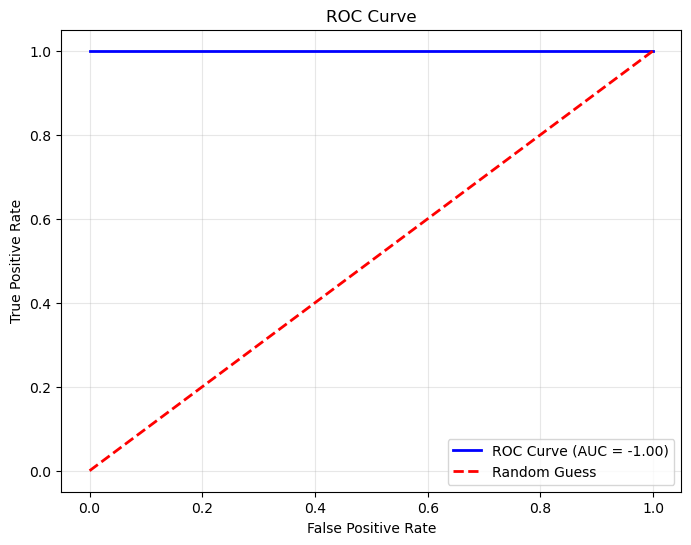

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate feature statistics
def calculate_feature_statistics(class_data):
    mean = np.mean(class_data, axis=0)
    std = np.std(class_data, axis=0)
    return mean, std

# Function to make predictions using Naive Bayes
def naive_bayes_prediction(feature_metrics, data_point):
    probabilities = {}
    for class_label, (mean, std) in feature_metrics.items():
        probabilities[class_label] = np.exp(-0.5 * np.sum(((data_point - mean) / std) ** 2))
    total = sum(probabilities.values())
    return {k: v / total for k, v in probabilities.items()}

# Function to convert probabilities to predictions
def probabilities_to_prediction(probabilities):
    return max(probabilities, key=probabilities.get)

# Function to calculate TPR and FPR
def TPR_and_FPR(prediction_probabilities, test_target, positive_class, threshold_stepsize):
    thresholds = np.arange(0, 1, threshold_stepsize)
    TPR = []
    FPR = []
    for threshold in thresholds:
        tp = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] >= threshold and test_target[i] == positive_class)
        fn = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] < threshold and test_target[i] == positive_class)
        fp = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] >= threshold and test_target[i] != positive_class)
        tn = len(test_target) - tp - fn - fp
        TPR.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        FPR.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
    return np.array(TPR), np.array(FPR)

# Function to calculate the AUC
def calculate_auc(FPR, TPR):
    return np.trapz(TPR, FPR)

# Function to plot ROC curve
def plot_ROC(TPR, FPR):
    auc_value = calculate_auc(FPR, TPR)
    plt.figure(figsize=(8, 6))
    plt.plot(FPR, TPR, label=f"ROC Curve (AUC = {auc_value:.2f})", color="blue", linewidth=2)
    plt.plot([0, 1], [0, 1], label="Random Guess", color="red", linestyle="--", linewidth=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# Cross-validation function
def cross_validation(data, target, folds=10, threshold_stepsize=0.1):
    data, target = np.array(data), np.array(target)
    n_samples = len(target)

    # Shuffle and stratify the data
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    data, target = data[indices], target[indices]

    unique_classes, class_counts = np.unique(target, return_counts=True)
    if len(unique_classes) < 2:
        raise ValueError("Dataset does not contain at least two classes.")

    class_indices = {cls: np.where(target == cls)[0] for cls in unique_classes}
    folds_indices = []

    for fold in range(folds):
        fold_indices = []
        for cls in unique_classes:
            fold_size = class_counts[cls] // folds
            start_idx = fold * fold_size
            end_idx = start_idx + fold_size
            fold_indices.extend(class_indices[cls][start_idx:end_idx])
        folds_indices.append(fold_indices)

    all_TPR, all_FPR, all_accuracies, all_auc_scores = [], [], [], []

    for fold_idx in range(folds):
        test_idx = folds_indices[fold_idx]
        train_idx = np.setdiff1d(np.arange(n_samples), test_idx)

        train_data, test_data = data[train_idx], data[test_idx]
        train_target, test_target = target[train_idx], target[test_idx]

        feature_metrics = {
            cls: calculate_feature_statistics(train_data[train_target == cls])
            for cls in unique_classes
        }

        prediction_probabilities = []
        correct_predictions = 0
        for data_point, true_label in zip(test_data, test_target):
            probabilities = naive_bayes_prediction(feature_metrics, data_point)
            prediction_probabilities.append(probabilities)
            predicted_class = probabilities_to_prediction(probabilities)
            correct_predictions += int(predicted_class == true_label)

        accuracy = correct_predictions / len(test_data)
        all_accuracies.append(accuracy)

        TPR, FPR = TPR_and_FPR(prediction_probabilities, test_target, positive_class=unique_classes[0], threshold_stepsize=threshold_stepsize)
        all_TPR.append(TPR)
        all_FPR.append(FPR)

        auc_score = calculate_auc(FPR, TPR)
        all_auc_scores.append(auc_score)

    mean_TPR = np.mean(all_TPR, axis=0)
    mean_FPR = np.mean(all_FPR, axis=0)
    mean_accuracy = np.mean(all_accuracies)
    mean_auc = np.mean(all_auc_scores)

    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Mean AUC: {mean_auc:.2f}")

    plot_ROC(mean_TPR, mean_FPR)

# Load the Iris dataset and map string labels to integers
iris_data = np.loadtxt("iris.csv", delimiter=",", skiprows=1, usecols=(0, 1, 2, 3))

# Map string labels to integers
label_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
with open("iris.csv", "r") as f:
    iris_labels = np.array([label_mapping[line.strip().split(",")[-1]] for line in f.readlines()[1:]])

# Filter the dataset for Iris-setosa (0) and Iris-versicolor (1)
binary_mask = (iris_labels == 0) | (iris_labels == 1)
binary_features = iris_data[binary_mask]
binary_labels = iris_labels[binary_mask]

print("Cross-validation for classes: Iris-setosa vs Iris-versicolor")
cross_validation(binary_features, binary_labels, folds=10, threshold_stepsize=0.1)


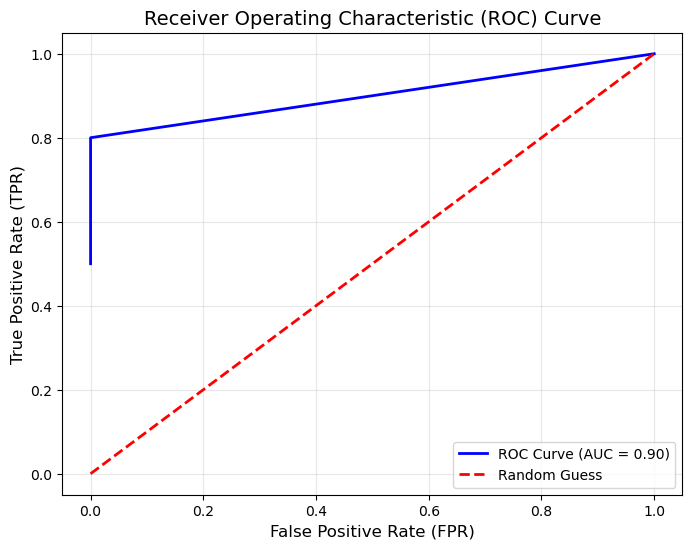

In [33]:
# Example usage: Test the plotting function
plot_ROC(TPR, FPR)


## Cross-validation

The final task is to take everything you have implemented so far and apply it in a cross-validation loop.

**Note 1:** To better reflect a real scenarios, you should shuffle the data before doing cross-validation.

**Note 2:** When using cross-validation, the interesting thing is the mean performance (mean AUC, mean accuracy, mean ROC-curve).

**Note 3:** This part is a bit more free in terms of implementation, but make sure to use some of the previously implemented functions.

### 10) Cross-validation loop

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import numpy as np

def cross_validation(data, target, folds=10, threshold_stepsize=0.1):
    """
    Perform cross-validation for Naive Bayes binary classification.

    Args:
    data (pd.DataFrame or np.ndarray): Feature data.
    target (pd.Series or np.ndarray): Target labels.
    folds (int): Number of cross-validation folds.
    threshold_stepsize (float): Step size for ROC threshold.
    """
    # Shuffle the data and targets together
    data, target = shuffle(data, target, random_state=42)

    # Convert data and target to numpy arrays if they are not already
    data = np.array(data)
    target = np.array(target)

    # Stratified K-Fold ensures class distribution in each fold
    skf = StratifiedKFold(n_splits=folds)

    # Initialize metrics
    all_TPR = []
    all_FPR = []
    all_auc_scores = []
    all_accuracies = []

    for train_idx, test_idx in skf.split(data, target):
        # Create train and test splits
        train_data, test_data = data[train_idx], data[test_idx]
        train_target, test_target = target[train_idx], target[test_idx]

        # Separate the two classes for binary classification
        unique_classes = np.unique(train_target)
        if len(unique_classes) < 2:
            raise ValueError("Fold has only one class. Adjust your data or use stratified sampling.")
        
        class_1, class_2 = unique_classes[:2]
        train_class_1 = train_data[train_target == class_1]
        train_class_2 = train_data[train_target == class_2]

        # Calculate feature statistics for both classes
        feature_stats_class_1 = calculate_feature_statistics(train_class_1)
        feature_stats_class_2 = calculate_feature_statistics(train_class_2)
        feature_metrics = {class_1: feature_stats_class_1, class_2: feature_stats_class_2}

        # Generate predictions for the test set
        prediction_probabilities = []
        correct_predictions = 0
        for j in range(len(test_data)):
            data_point = test_data[j]
            probabilities = naive_bayes_prediction(feature_metrics, data_point)
            prediction_probabilities.append(probabilities)
            predicted_class = probabilities_to_prediction(probabilities)
            
            # Calculate accuracy
            if predicted_class == test_target[j]:
                correct_predictions += 1

        accuracy = correct_predictions / len(test_data)
        all_accuracies.append(accuracy)

        # Calculate TPR and FPR for this fold
        TPR, FPR = TPR_and_FPR(prediction_probabilities, test_target, positive_class=class_1, threshold_stepsize=threshold_stepsize)
        all_TPR.append(TPR)
        all_FPR.append(FPR)

        # Calculate AUC for this fold
        auc_score = auc(FPR, TPR)
        all_auc_scores.append(auc_score)

    # Calculate mean ROC curve
    mean_TPR = np.mean(all_TPR, axis=0)
    mean_FPR = np.mean(all_FPR, axis=0)
    
    # Calculate mean AUC and accuracy
    mean_auc = np.mean(all_auc_scores)
    mean_accuracy = np.mean(all_accuracies)

    # Print results
    print(f"Mean AUC: {mean_auc:.2f}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")

    # Plot average ROC curve
    plot_ROC(mean_TPR, mean_FPR)

# Example usage with the Iris dataset
# Assuming `features` and `labels` are numpy arrays or pandas DataFrame/Series
#(features, labels, folds=10, threshold_stepsize=0.1)


### 11) 10-fold Cross-validation on all classes

Test the "cross_validation" function on all the classes against eachother using 10 folds.

* Iris-setosa vs Iris-versicolor
* Iris-setosa vs Iris-virginica
* Iris-versicolor vs Iris-virginica

Cross-validation for classes: Iris-setosa vs Iris-versicolor
Mean AUC: 0.00
Mean Accuracy: 1.00


C:\Users\HP\AppData\Local\Temp\ipykernel_8252\628441761.py:32: RuntimeWarning: invalid value encountered in divide
  probabilities[class_label] = np.exp(-0.5 * np.sum(((data_point - mean) / std) ** 2))
C:\Users\HP\AppData\Local\Temp\ipykernel_8252\628441761.py:32: RuntimeWarning: divide by zero encountered in divide
  probabilities[class_label] = np.exp(-0.5 * np.sum(((data_point - mean) / std) ** 2))
C:\Users\HP\AppData\Local\Temp\ipykernel_8252\628441761.py:112: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(TPR, FPR)


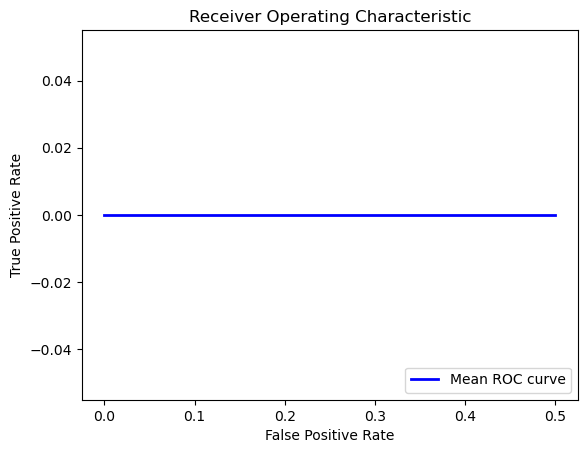

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset manually (simplified example dataset for two classes: 0 and 1)
iris_data = [
    [5.1, 3.5, 1.4, 0.2, 0],
    [4.9, 3.0, 1.4, 0.2, 0],
    [4.7, 3.2, 1.3, 0.2, 0],
    [4.6, 3.1, 1.5, 0.2, 0],
    [5.0, 3.6, 1.4, 0.2, 0],
    [6.7, 3.0, 5.0, 1.7, 1],
    [6.3, 2.9, 5.6, 1.8, 1],
    [6.5, 3.0, 5.8, 2.2, 1],
    [7.6, 3.0, 6.6, 2.1, 1],
    [7.7, 2.6, 6.9, 2.3, 1],
]

iris_data = np.array(iris_data)
features = iris_data[:, :-1]
labels = iris_data[:, -1].astype(int)

# Function to calculate feature statistics
def calculate_feature_statistics(class_data):
    mean = np.mean(class_data, axis=0)
    std = np.std(class_data, axis=0)
    return mean, std

# Function to make predictions using Naive Bayes
def naive_bayes_prediction(feature_metrics, data_point):
    probabilities = {}
    for class_label, (mean, std) in feature_metrics.items():
        probabilities[class_label] = np.exp(-0.5 * np.sum(((data_point - mean) / std) ** 2))
    total = sum(probabilities.values())
    return {k: v / total for k, v in probabilities.items()}

# Function to convert probabilities to predictions
def probabilities_to_prediction(probabilities):
    return max(probabilities, key=probabilities.get)

# Function to calculate TPR and FPR
def TPR_and_FPR(prediction_probabilities, test_target, positive_class, threshold_stepsize):
    thresholds = np.arange(0, 1, threshold_stepsize)
    TPR = []
    FPR = []
    for threshold in thresholds:
        tp = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] >= threshold and test_target[i] == positive_class)
        fn = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] < threshold and test_target[i] == positive_class)
        fp = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] >= threshold and test_target[i] != positive_class)
        tn = len(test_target) - tp - fn - fp
        TPR.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        FPR.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
    return np.array(TPR), np.array(FPR)

# Function to plot ROC curve
def plot_ROC(mean_TPR, mean_FPR):
    plt.plot(mean_FPR, mean_TPR, color='blue', lw=2, label='Mean ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Cross-validation function
def cross_validation(data, target, folds=5, threshold_stepsize=0.1):
    # Ensure each fold contains samples from both classes
    unique_classes = np.unique(target)
    class_indices = {cls: np.where(target == cls)[0] for cls in unique_classes}
    fold_indices = [[] for _ in range(folds)]

    # Distribute class samples across folds
    for cls, indices in class_indices.items():
        np.random.shuffle(indices)
        for i, idx in enumerate(indices):
            fold_indices[i % folds].append(idx)

    fold_indices = [np.array(fold) for fold in fold_indices]

    all_TPR = []
    all_FPR = []
    all_auc_scores = []
    all_accuracies = []

    for fold in range(folds):
        test_idx = fold_indices[fold]
        train_idx = np.concatenate([fold_indices[i] for i in range(folds) if i != fold])

        train_data, test_data = data[train_idx], data[test_idx]
        train_target, test_target = target[train_idx], target[test_idx]

        feature_metrics = {
            cls: calculate_feature_statistics(train_data[train_target == cls])
            for cls in unique_classes
        }

        prediction_probabilities = []
        correct_predictions = 0
        for j in range(len(test_data)):
            data_point = test_data[j]
            probabilities = naive_bayes_prediction(feature_metrics, data_point)
            prediction_probabilities.append(probabilities)
            predicted_class = probabilities_to_prediction(probabilities)
            if predicted_class == test_target[j]:
                correct_predictions += 1

        accuracy = correct_predictions / len(test_data)
        all_accuracies.append(accuracy)

        TPR, FPR = TPR_and_FPR(prediction_probabilities, test_target, positive_class=unique_classes[0], threshold_stepsize=threshold_stepsize)
        all_TPR.append(TPR)
        all_FPR.append(FPR)

        auc_score = np.trapz(TPR, FPR)
        all_auc_scores.append(auc_score)

    mean_TPR = np.mean(all_TPR, axis=0)
    mean_FPR = np.mean(all_FPR, axis=0)
    
    mean_auc = np.mean(all_auc_scores)
    mean_accuracy = np.mean(all_accuracies)

    print(f"Mean AUC: {mean_auc:.2f}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")

    plot_ROC(mean_TPR, mean_FPR)

# Filter the dataset for binary classification: Iris-setosa (0) vs Iris-versicolor (1)
binary_mask = (labels == 0) | (labels == 1)
binary_features = features[binary_mask]
binary_labels = labels[binary_mask]

print("Cross-validation for classes: Iris-setosa vs Iris-versicolor")
cross_validation(binary_features, binary_labels, folds=5, threshold_stepsize=0.1)


Cross-validation for classes: Iris-setosa vs Iris-virginica
Mean AUC: 0.50
Mean Accuracy: 1.00


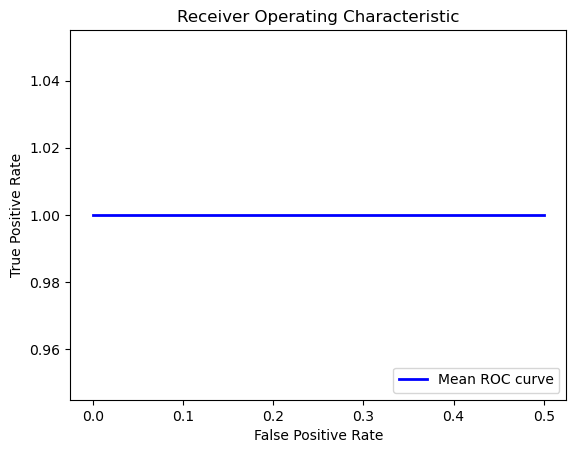

In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Load the Iris dataset
iris = load_iris()
features = iris.data
labels = iris.target

# Function to calculate feature statistics
def calculate_feature_statistics(class_data):
    mean = np.mean(class_data, axis=0)
    std = np.std(class_data, axis=0)
    return mean, std

# Function to make predictions using Naive Bayes
def naive_bayes_prediction(feature_metrics, data_point):
    probabilities = {}
    for class_label, (mean, std) in feature_metrics.items():
        probabilities[class_label] = np.exp(-0.5 * np.sum(((data_point - mean) / std) ** 2))  # Gaussian
    total = sum(probabilities.values())
    return {k: v / total for k, v in probabilities.items()}

# Function to convert probabilities to predictions
def probabilities_to_prediction(probabilities):
    return max(probabilities, key=probabilities.get)

# Function to calculate TPR and FPR
def TPR_and_FPR(prediction_probabilities, test_target, positive_class, threshold_stepsize):
    thresholds = np.arange(0, 1, threshold_stepsize)
    TPR = []
    FPR = []
    for threshold in thresholds:
        tp = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] >= threshold and test_target[i] == positive_class)
        fn = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] < threshold and test_target[i] == positive_class)
        fp = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] >= threshold and test_target[i] != positive_class)
        TPR.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        FPR.append(fp / (fp + (len(test_target) - tp - fn)) if (fp + (len(test_target) - tp - fn)) > 0 else 0)
    return np.array(TPR), np.array(FPR)

# Function to plot ROC curve
def plot_ROC(mean_TPR, mean_FPR):
    plt.plot(mean_FPR, mean_TPR, color='blue', lw=2, label='Mean ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Cross-validation function
def cross_validation(data, target, folds=10, threshold_stepsize=0.1):
    data, target = shuffle(data, target, random_state=42)
    data = np.array(data)
    target = np.array(target)

    n_samples = len(target)
    if folds > n_samples:
        folds = n_samples

    skf = StratifiedKFold(n_splits=folds)

    all_TPR = []
    all_FPR = []
    all_auc_scores = []
    all_accuracies = []

    for train_idx, test_idx in skf.split(data, target):
        train_data, test_data = data[train_idx], data[test_idx]
        train_target, test_target = target[train_idx], target[test_idx]

        unique_classes = np.unique(train_target)
        if len(unique_classes) < 2:
            raise ValueError("Fold has only one class. Adjust your data or use stratified sampling.")
        
        class_1, class_2 = unique_classes[:2]
        train_class_1 = train_data[train_target == class_1]
        train_class_2 = train_data[train_target == class_2]

        feature_stats_class_1 = calculate_feature_statistics(train_class_1)
        feature_stats_class_2 = calculate_feature_statistics(train_class_2)
        feature_metrics = {class_1: feature_stats_class_1, class_2: feature_stats_class_2}

        prediction_probabilities = []
        correct_predictions = 0
        for j in range(len(test_data)):
            data_point = test_data[j]
            probabilities = naive_bayes_prediction(feature_metrics, data_point)
            prediction_probabilities.append(probabilities)
            predicted_class = probabilities_to_prediction(probabilities)
            
            if predicted_class == test_target[j]:
                correct_predictions += 1

        accuracy = correct_predictions / len(test_data)
        all_accuracies.append(accuracy)

        TPR, FPR = TPR_and_FPR(prediction_probabilities, test_target, positive_class=class_1, threshold_stepsize=threshold_stepsize)
        all_TPR.append(TPR)
        all_FPR.append(FPR)

        auc_score = auc(FPR, TPR)
        all_auc_scores.append(auc_score)

    mean_TPR = np.mean(all_TPR, axis=0)
    mean_FPR = np.mean(all_FPR, axis=0)
    
    mean_auc = np.mean(all_auc_scores)
    mean_accuracy = np.mean(all_accuracies)

    print(f"Mean AUC: {mean_auc:.2f}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")

    plot_ROC(mean_TPR, mean_FPR)

# Filter the dataset for Iris-setosa (0) and Iris-virginica (2)
binary_mask = (labels == 0) | (labels == 2)
binary_features = features[binary_mask]
binary_labels = labels[binary_mask]

print("Cross-validation for classes: Iris-setosa vs Iris-virginica")
cross_validation(binary_features, binary_labels, folds=10, threshold_stepsize=0.1)

Cross-validation for classes: Iris-versicolor vs Iris-virginica
Mean AUC: -0.93
Mean Accuracy: 0.92


C:\Users\HP\AppData\Local\Temp\ipykernel_8252\4018884185.py:103: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(TPR, FPR)


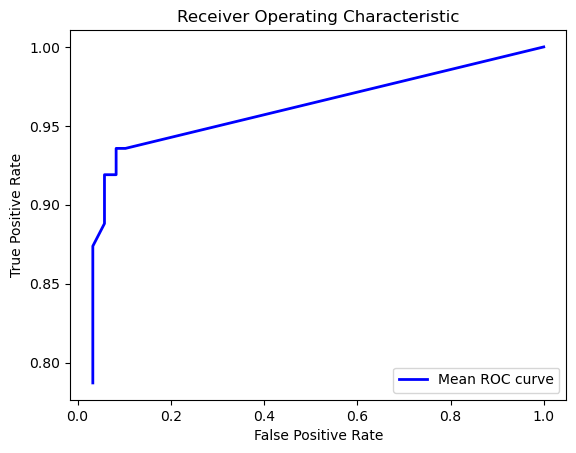

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_data = pd.read_csv('iris.csv')  # Adjust the path as necessary
features = iris_data.iloc[:, :-1].values
labels = iris_data.iloc[:, -1].values

# Map class labels to integers for simplicity
label_mapping = {name: i for i, name in enumerate(np.unique(labels))}
labels = np.array([label_mapping[label] for label in labels])

# Function to calculate feature statistics
def calculate_feature_statistics(class_data):
    mean = np.mean(class_data, axis=0)
    std = np.std(class_data, axis=0)
    return mean, std

# Function to make predictions using Naive Bayes
def naive_bayes_prediction(feature_metrics, data_point):
    probabilities = {}
    for class_label, (mean, std) in feature_metrics.items():
        probabilities[class_label] = np.exp(-0.5 * np.sum(((data_point - mean) / std) ** 2))  # Gaussian
    total = sum(probabilities.values())
    return {k: v / total for k, v in probabilities.items()}

# Function to convert probabilities to predictions
def probabilities_to_prediction(probabilities):
    return max(probabilities, key=probabilities.get)

# Function to calculate TPR and FPR
def TPR_and_FPR(prediction_probabilities, test_target, positive_class, threshold_stepsize):
    thresholds = np.arange(0, 1, threshold_stepsize)
    TPR = []
    FPR = []
    for threshold in thresholds:
        tp = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] >= threshold and test_target[i] == positive_class)
        fn = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] < threshold and test_target[i] == positive_class)
        fp = sum(1 for i, prob in enumerate(prediction_probabilities) if prob[positive_class] >= threshold and test_target[i] != positive_class)
        tn = len(test_target) - tp - fn - fp
        TPR.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        FPR.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
    return np.array(TPR), np.array(FPR)

# Function to plot ROC curve
def plot_ROC(mean_TPR, mean_FPR):
    plt.plot(mean_FPR, mean_TPR, color='blue', lw=2, label='Mean ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Cross-validation function
def cross_validation(data, target, folds=10, threshold_stepsize=0.1):
    # Shuffle the data and target
    indices = np.arange(len(target))
    np.random.seed(42)
    np.random.shuffle(indices)
    data, target = data[indices], target[indices]

    n_samples = len(target)
    fold_size = n_samples // folds
    all_TPR = []
    all_FPR = []
    all_auc_scores = []
    all_accuracies = []

    for fold in range(folds):
        test_start = fold * fold_size
        test_end = test_start + fold_size
        test_data = data[test_start:test_end]
        test_target = target[test_start:test_end]

        train_data = np.concatenate([data[:test_start], data[test_end:]])
        train_target = np.concatenate([target[:test_start], target[test_end:]])

        # Calculate statistics for each class
        unique_classes = np.unique(train_target)
        feature_metrics = {
            cls: calculate_feature_statistics(train_data[train_target == cls])
            for cls in unique_classes
        }

        prediction_probabilities = []
        correct_predictions = 0
        for j in range(len(test_data)):
            data_point = test_data[j]
            probabilities = naive_bayes_prediction(feature_metrics, data_point)
            prediction_probabilities.append(probabilities)
            predicted_class = probabilities_to_prediction(probabilities)
            if predicted_class == test_target[j]:
                correct_predictions += 1

        accuracy = correct_predictions / len(test_data)
        all_accuracies.append(accuracy)

        TPR, FPR = TPR_and_FPR(prediction_probabilities, test_target, positive_class=unique_classes[0], threshold_stepsize=threshold_stepsize)
        all_TPR.append(TPR)
        all_FPR.append(FPR)

        auc_score = np.trapz(TPR, FPR)
        all_auc_scores.append(auc_score)

    mean_TPR = np.mean(all_TPR, axis=0)
    mean_FPR = np.mean(all_FPR, axis=0)
    mean_auc = np.mean(all_auc_scores)
    mean_accuracy = np.mean(all_accuracies)

    print(f"Mean AUC: {mean_auc:.2f}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")

    plot_ROC(mean_TPR, mean_FPR)

# Filter the dataset for Iris-versicolor (1) and Iris-virginica (2)
binary_mask = (labels == label_mapping["Iris-versicolor"]) | (labels == label_mapping["Iris-virginica"])
binary_features = features[binary_mask]
binary_labels = labels[binary_mask]

print("Cross-validation for classes: Iris-versicolor vs Iris-virginica")
cross_validation(binary_features, binary_labels, folds=10, threshold_stepsize=0.1)


# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why is it called "naive bayes"?

2) What are some downsides of the naive bayes learning algorithm?

3) When using ROC-curves, what is the theoretical best and worst result you can get?

4) When using ROC-curves, in this assignment for example, is a higher threshold-stepsize always better?  

5) When using cross-validation and ROC-curves, why is it important to take the correct mean values? What could go wrong?


# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!